In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

sns.set()

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import mnist

# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, X_test,labels_train,labels_test

# training function 
def train(x,y,lambda_cnst):
    a = (np.dot(x.T,x)) + lambda_cnst*np.identity(np.shape(x)[1])
    b = (np.dot(x.T,y))
    w_hat = np.linalg.solve(a,b)
    return w_hat

# prediction function 
def predict(w,x_prime):
    classified = np.argmax(np.dot(x_prime,w),axis=1)
    return classified

# evaluate performance 
def evaluate(results,truth):
    truth_array = np.array(truth)
    results_array = np.array(results)
    accuracy = np.sum(truth_array==results_array)/len(truth_array)
    #import pdb; pdb.set_trace()
    return accuracy

def feature_transform_old(pixels,p):
    var = 0.1
    std_dev = var**0.5
    center = 0
    d = np.shape(pixels)[0]
    g_vec = std_dev*np.random.randn(d,p) + center
    b = np.squeeze(2*np.pi*np.random.rand(p,1))
    
    transformed_pixels = np.cos(np.squeeze(np.dot(g_vec.T,pixels))+b)
    return transformed_pixels

def feature_transform(data,p):
    # NEED SAME RANDOM SEED
    np.random.seed(1)
    
    var = 0.1
    std_dev = var**0.5
    center = 0
    d = np.shape(data)[1]
    g_vec = std_dev*np.random.randn(d,p) + center
    b = np.squeeze(2*np.pi*np.random.rand(p,1))
    data_matrix = np.zeros((np.shape(data)[0],p))
    data_matrix = [(np.dot(g_vec.T,row)+b) for row in data]
    transformed_data = np.cos(data_matrix)
    return transformed_data

def random_partition(data,labels_onehot,labels,proportion):
    # randomly generate indices to select training data from 
    inds = np.array(np.random.choice(len(data),np.int(proportion*len(data)),replace=False))
    
    # select the training data and training labels 
    train_set = data[inds,:]
    train_onehot_labels = labels_onehot[inds,:]
    train_labels = labels[inds]
    
    # make sets to figure out the elements not in the training set for the validation set 
    inds_set = set(inds)
    total_set = set(np.arange(len(data)))
    
    # create set that has other indices 
    valid_inds = np.array(list(total_set - inds_set))
    
    # get validation labels and data 
    validation_set = data[valid_inds,:]
    validation_onehot_labels = labels_onehot[valid_inds,:]
    validation_labels = labels[valid_inds]
    #import pdb; pdb.set_trace()
    return train_set,train_onehot_labels,train_labels,validation_set,validation_onehot_labels,validation_labels,inds,valid_inds



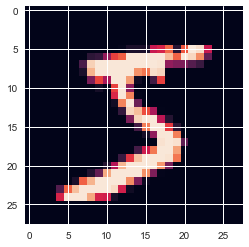

5

In [2]:
x_train,x_test,labels_train,labels_test = load_dataset()

# demean 
#x_train = x_train - np.matlib.repmat(np.mean(x_train,axis=1),np.shape(x_train)[1],1).T

# demean with training data
#x_test = x_test - np.matlib.repmat(np.mean(x_train,axis=1),np.shape(x_test)[1],1).T

single_image = np.reshape(x_train[0][:],[28,28])
plt.imshow(single_image)
plt.show()
labels_train[0]

labels_onehot_train = np.zeros((np.max(np.size(labels_train)),10))
for i in range(len(labels_onehot_train)):
    labels_onehot_train[i,labels_train[i]] = 1
    
labels_onehot_test = np.zeros((np.max(np.size(labels_test)),10))
for i in range(len(labels_onehot_test)):
    labels_onehot_test[i,labels_test[i]] = 1

In [56]:
lambda_cnst = 10**-4
w_hat = train(x_train,labels_onehot_train,lambda_cnst)
predictions_train = predict(w_hat,x_train)
predictions_test = predict(w_hat,x_test)

train_acc = evaluate(predictions_train,labels_train)
test_acc = evaluate(predictions_test,labels_test)

print('The training accuracy is {} %'.format(100*train_acc))
print('The test accuracy is {} %'.format(100*test_acc))

prop_train = 0.8
train_s,train_ohl,train_l,valid_s,valid_ohl,valid_l,train_inds,valid_inds = random_partition(x_train,labels_onehot_train,labels_train,prop_train)

The training accuracy is 85.195 %
The test accuracy is 85.34 %


In [57]:
np.sort(train_inds)
np.sort(valid_inds)
np.shape(train_inds)
np.shape(valid_inds)

array([    0,     2,     3, ..., 59996, 59998, 59999])

array([    1,     5,    22, ..., 59981, 59987, 59997])

(48000,)

(12000,)

In [58]:
np.shape(train_s)
np.shape(train_ohl)
np.shape(train_l)
np.shape(valid_s)
np.shape(valid_ohl)
np.shape(valid_l)
valid_ohl
valid_l

(48000, 784)

(48000, 10)

(48000,)

(12000, 784)

(12000, 10)

(12000,)

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

array([0, 4, 2, ..., 1, 5, 1], dtype=uint8)

In [59]:
lambda_cnst = 10**-4
w_hat = train(train_s,train_ohl,lambda_cnst)
predictions_train = predict(w_hat,train_s)
predictions_valid = predict(w_hat,valid_s)

train_acc = evaluate(predictions_train,train_l)
valid_acc = evaluate(predictions_valid,valid_l)

print('The training accuracy is {} %'.format(100*train_acc))
print('The validation accuracy is {} %'.format(100*valid_acc))


The training accuracy is 85.22708333333333 %
The validation accuracy is 84.81666666666666 %


In [ ]:
#p_list = [10,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
p_list = [10,100,500,2000]

train_error_vec = []
valid_error_vec = []

for p in p_list:
    train_s_trans = feature_transform(train_s,p)
    valid_s_trans = feature_transform(valid_s,p)
    
    w_hat = train(train_s_trans,train_ohl,lambda_cnst)

    predictions_train = predict(w_hat,train_s_trans)
    
    predictions_valid = predict(w_hat,valid_s_trans)
    
    train_err = 1 - evaluate(predictions_train,train_l)
    valid_err = 1 - evaluate(predictions_valid,valid_l)
    
    train_error_vec.append(train_err)
    valid_error_vec.append(valid_err)


In [ ]:
plt.figure()
plt.plot(p_list,train_error_vec,label='training error')
plt.plot(p_list,valid_error_vec,label='validation error')
plt.xlabel('p')
plt.ylabel('error')
plt.title('Training and validation error for different values of p')
plt.legend()

valid_error_vec
train_error_vec

In [62]:
np.shape(train_s_trans)
np.shape(valid_s_trans)
np.shape(x_train)
predictions_valid
valid_l
predictions_train
train_l


(48000, 2000)

(12000, 2000)

(60000, 784)

array([0, 4, 2, ..., 1, 3, 1], dtype=int64)

array([0, 4, 2, ..., 1, 5, 1], dtype=uint8)

array([9, 9, 2, ..., 5, 2, 1], dtype=int64)

array([9, 9, 2, ..., 5, 2, 1], dtype=uint8)

In [ ]:
# hoeffding's , using p from above 

# optimal p 
p = 4000

train_s_trans = feature_transform(train_s,p)
w_hat = train(train_s_trans,train_ohl,lambda_cnst)

test_trans = feature_transform(x_test,p)

predictions_test = predict(w_hat,test_trans)

test_acc = evaluate(predictions_test,labels_test)
print('The test accuracy is {} %'.format(100*test_acc))

sigma = 0.025
hoeff = np.sqrt(np.log(2/sigma)/(2*np.shape(test_trans)[0]))

In [94]:
conf_interval = [test_acc-hoeff,test_acc+hoeff]
conf_interval[0]
conf_interval[1]
print('the confidence interval is {}%, {}%'.format(100*conf_interval[0],100*conf_interval[1]))

0.071697928126992008

0.10130207187300798

the confidence interval is 7.1697928126992005,10.130207187300798 %


In [54]:
predictions_test
labels_test
np.shape(predictions_train)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

(300,)

0.10480439192806094

-0.01378800796224541

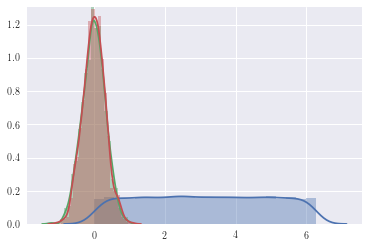

In [48]:
p = 10000
b = np.squeeze(2*np.pi*np.random.rand(p,1))
sns.distplot(b)
var = 0.1
std_dev = var**0.5
center = 0
d = 784
g_vec = std_dev*np.random.randn(d,p) + center
sns.distplot(g_vec[:,0])
sns.distplot(g_vec[:,1])
(np.std(g_vec[:,0]))**2
np.mean(g_vec[:,0])

In [55]:
matrix = np.array([[1,2,3],[4,5,6]])
[np.mean(i) for i in matrix.T]

[2.5, 3.5, 4.5]

In [56]:
np.cos(matrix)

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029]])

In [25]:
a = np.array([1,2,3,4,5,6,7])

In [27]:
a[[1,2,3]]

array([2, 3, 4])

In [21]:
evaluate([1,1,1,1,1,1],[1,0,1,1,1,1])

0.83333333333333337